In [1]:
import numpy as np
import pandas as pd
import glob

from dredFISH.Utils.__init__plots import *
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Vitte_2017/all_samples_vitte_2017.csv', index_col=0)
df

,09156_9A,09204_9B,16017_10,16018_9,9189_28,10074_9C,10074_11C,9189_29,16016_9B,16019_10B,10321_9C,16017_9
0610005C13Rik,0.888488,0.303175,2.043743,2.031960,0.943266,0.464416,1.012329,2.105610,1.084436,1.251738,2.635073,1.557494
0610007P14Rik,25.081776,12.745322,16.987414,33.054788,34.950680,14.459216,17.892164,32.910832,35.937393,28.397158,50.226337,27.779976
0610009B22Rik,6.873459,10.611353,3.897211,9.152386,14.510638,8.366501,10.191540,13.395471,8.800302,8.055716,15.539829,5.584421
0610009L18Rik,2.624477,1.593652,2.318841,0.979557,1.880742,1.535049,0.978639,1.056913,2.334210,1.905878,2.445029,1.068206
0610009O20Rik,13.930079,10.626535,12.145331,14.074078,12.224087,9.447894,7.937601,16.646017,17.619664,17.432945,25.167940,10.137542
...,...,...,...,...,...,...,...,...,...,...,...,...
Zyx,58.753292,26.975146,31.310726,27.456352,26.618328,33.827626,39.365637,22.048976,17.213652,26.845632,21.838813,35.968882
Zzef1,11.970552,21.986994,14.091452,18.506863,12.497643,23.715714,30.064767,12.021912,14.404425,10.943377,9.429021,15.198300
Zzz3,18.511256,17.846903,17.590976,20.592868,23.847759,22.399303,21.302717,20.303668,18.548913,20.936089,27.026387,15.788384
a,0.053355,0.196626,5.438513,0.035049,10.705799,0.000000,0.000000,0.157570,7.472737,16.642332,30.771986,10.032951


In [3]:
# sns.boxplot(df.min(axis=1))
df.sum(axis=0)

09156_9A     444679.833755
09204_9B     403918.342183
16017_10     408721.931997
16018_9      393108.941677
9189_28      426239.918614
10074_9C     415766.034387
10074_11C    433675.200706
9189_29      418216.476572
16016_9B     407261.136792
16019_10B    399267.622444
10321_9C     442367.038908
16017_9      415932.896561
dtype: float64

In [4]:
stds = df.std(axis=1)
means = df.mean(axis=1)
stds

0610005C13Rik     0.717525
0610007P14Rik    10.873760
0610009B22Rik     3.516159
0610009L18Rik     0.614374
0610009O20Rik     4.738216
                   ...    
Zyx              10.834073
Zzef1             6.169698
Zzz3              3.069067
a                 9.395495
l7Rn6             2.037941
Length: 24060, dtype: float64

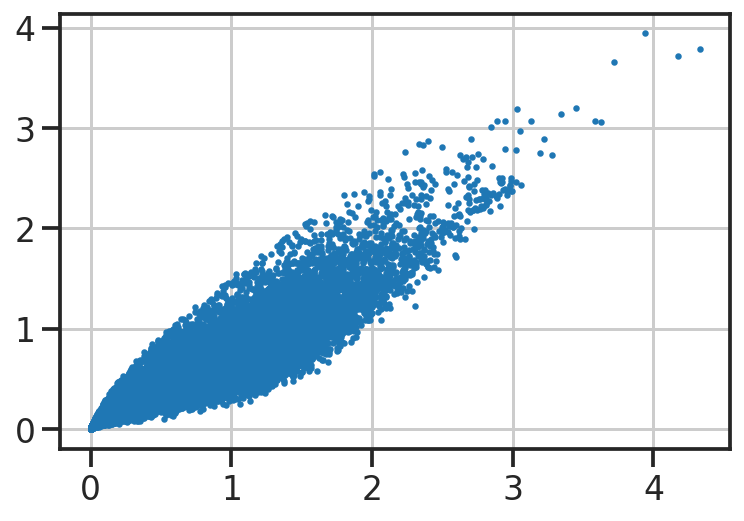

In [5]:
plt.scatter(np.log10(means.values+1), 
            np.log10(stds.values+1),
            s=3,
           )

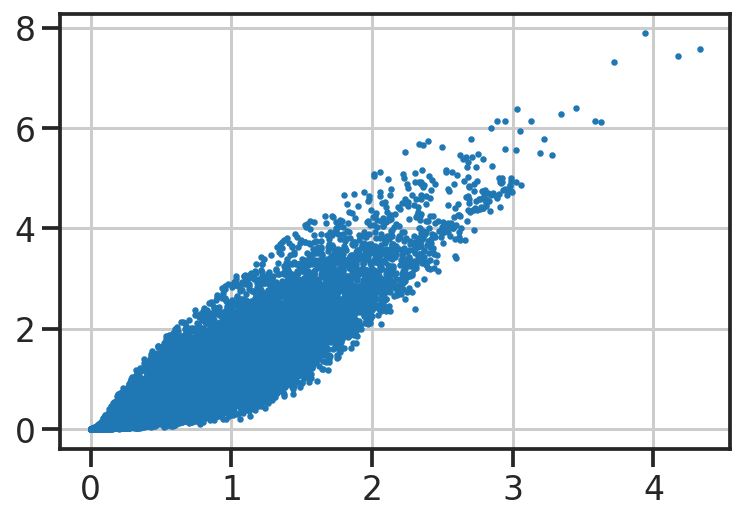

In [6]:
plt.scatter(np.log10(means.values+1), 
            np.log10(np.power(stds.values, 2)+1),
            s=3,
           )

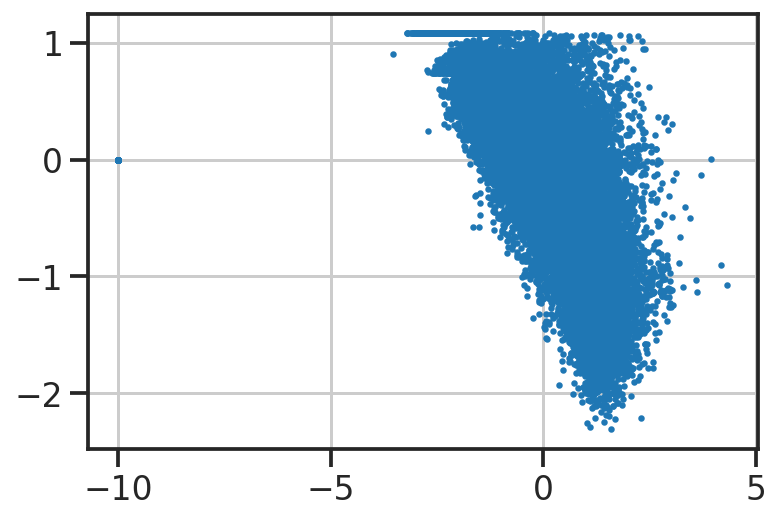

In [7]:
plt.scatter(np.log10(means.values+1e-10), #+1), 
            np.log10(np.power((stds.values+1e-10)/(means.values+1e-10), 2)), #+1),
            s=3,
           )

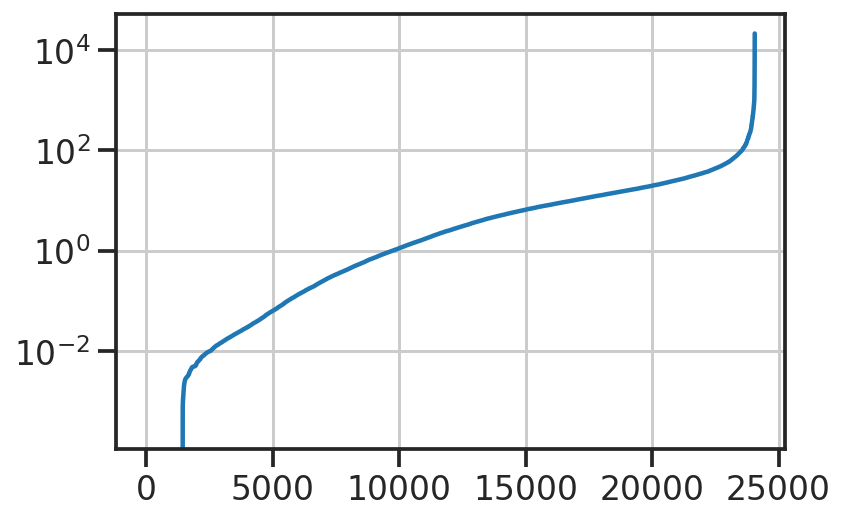

In [8]:
plt.plot(np.sort(means))
plt.yscale('log')

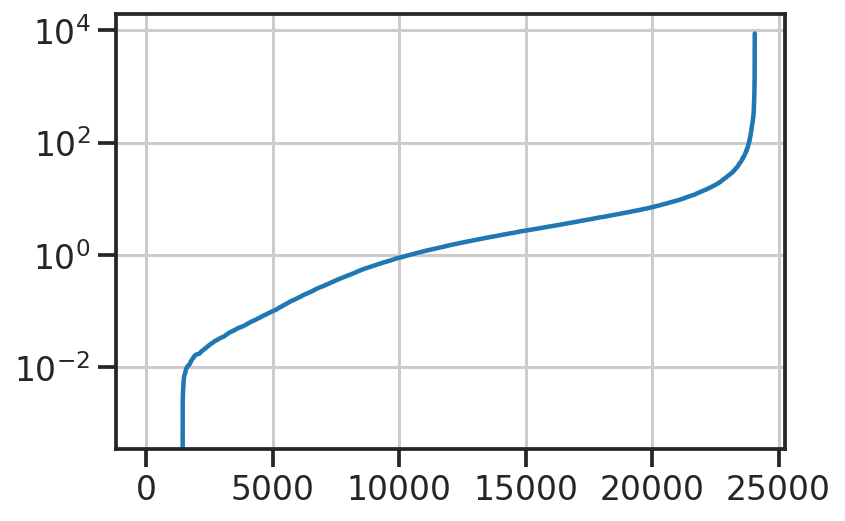

In [9]:
plt.plot(np.sort(stds))
plt.yscale('log')

In [10]:
print((stds>10).sum(), (stds>100).sum())
cond = stds>10
dfhv = df[cond]
dfhv.shape

2859 233


(2859, 12)

In [11]:
dfhv_z = dfhv.subtract(dfhv.mean(axis=1), axis=0).divide(dfhv.std(axis=1), axis=0)
dfhv_z

,09156_9A,09204_9B,16017_10,16018_9,9189_28,10074_9C,10074_11C,9189_29,16016_9B,16019_10B,10321_9C,16017_9
0610007P14Rik,-0.225633,-1.360149,-0.970027,0.507601,0.681956,-1.202532,-0.886822,0.494362,0.772699,0.079265,2.086774,0.022506
0610031J06Rik,0.648939,-1.165509,-0.885045,1.930918,-0.408222,-1.108523,-1.339753,0.799850,0.507989,0.524444,0.581364,-0.086451
1110007C09Rik,-0.725424,2.716609,1.217766,-0.097764,-0.241829,-0.080813,-0.262049,-0.542255,-0.561392,-0.612170,-0.683770,-0.126908
1110038B12Rik,2.041199,0.647937,-0.893748,-1.110387,0.258439,0.040344,0.575109,0.104546,-1.001172,-0.820176,1.147678,-0.989768
1190002N15Rik,-0.312361,-0.293742,-0.300108,-0.292776,-0.315644,-0.303581,-0.312165,-0.250606,-0.284290,-0.260053,3.174549,-0.249223
...,...,...,...,...,...,...,...,...,...,...,...,...
Zmpste24,-0.733379,-0.259265,-0.351472,-0.445212,0.229322,2.224211,1.922299,-0.597728,-0.501433,-0.639435,-0.448330,-0.399578
Znfx1,-0.109495,-0.593815,-0.586620,1.470967,-0.001443,-1.178333,-1.184497,1.168367,1.386491,1.031039,-0.731472,-0.671188
Zranb2,0.790868,0.021470,-2.029776,-0.397863,1.004026,0.471504,-0.363655,0.046628,-0.028750,0.054528,1.737727,-1.306708
Zwint,-0.043252,-1.259771,0.231322,-0.780572,1.088844,-1.129578,-1.004429,-0.248787,-0.145720,2.123745,0.551448,0.616749


In [12]:
dfhv_z.std(axis=1), dfhv_z.mean(axis=1)

(0610007P14Rik    1.0
 0610031J06Rik    1.0
 1110007C09Rik    1.0
 1110038B12Rik    1.0
 1190002N15Rik    1.0
                 ... 
 Zmpste24         1.0
 Znfx1            1.0
 Zranb2           1.0
 Zwint            1.0
 Zyx              1.0
 Length: 2859, dtype: float64,
 0610007P14Rik    4.932397e-16
 0610031J06Rik    2.740863e-16
 1110007C09Rik   -3.700743e-16
 1110038B12Rik    3.238150e-16
 1190002N15Rik    3.932040e-17
                      ...     
 Zmpste24        -6.013708e-17
 Znfx1           -2.312965e-16
 Zranb2           4.070818e-16
 Zwint           -2.498002e-16
 Zyx              7.864080e-17
 Length: 2859, dtype: float64)

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


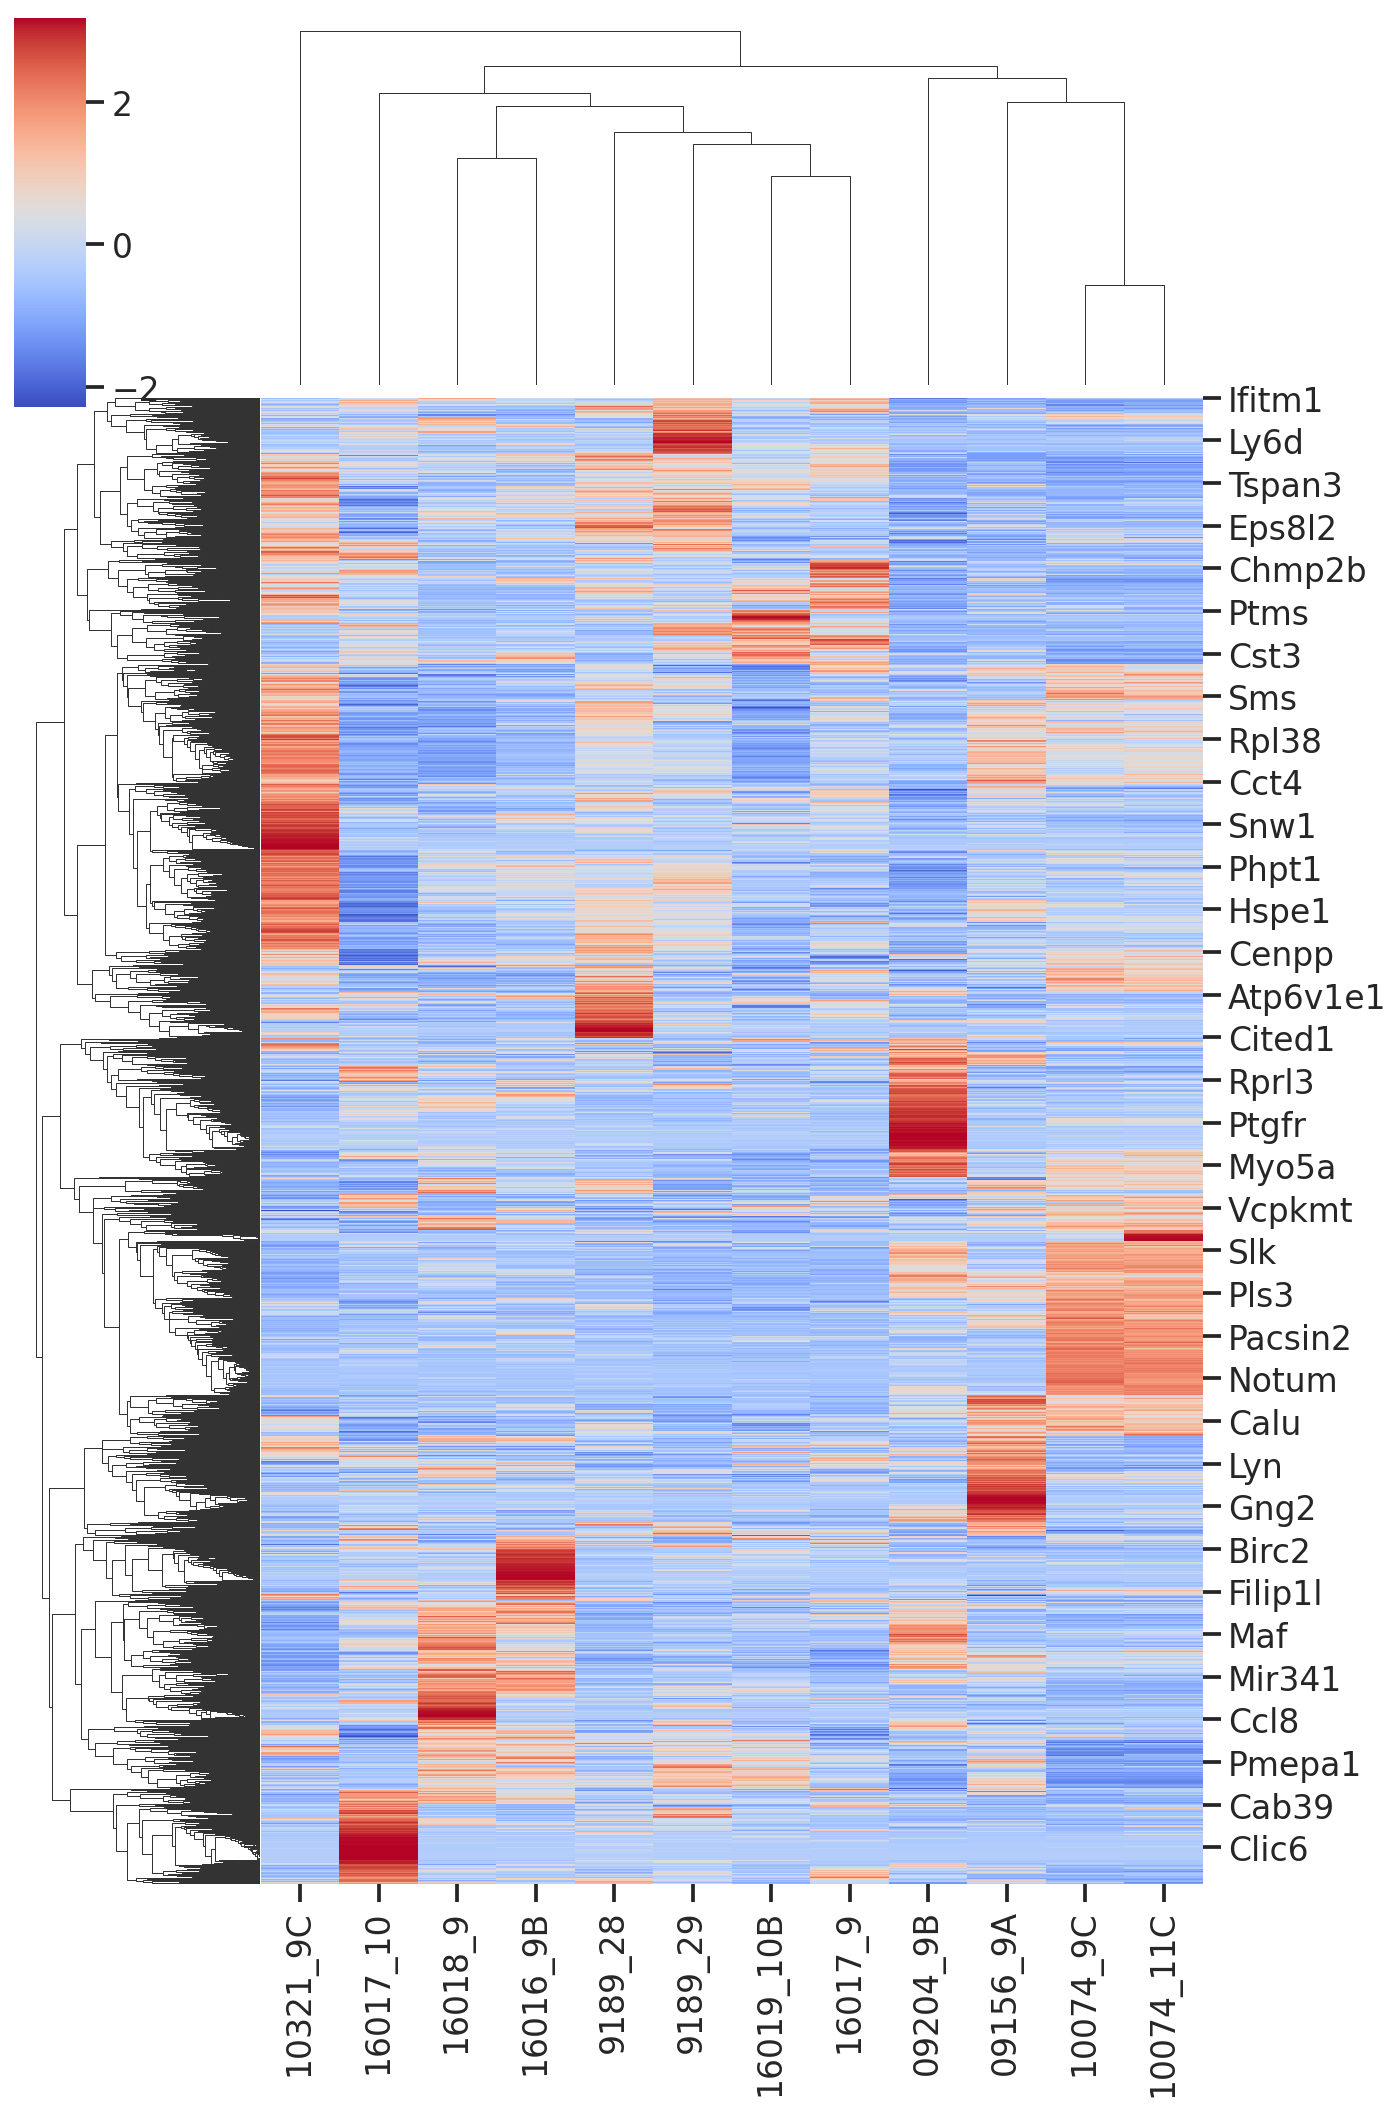

In [13]:
sns.clustermap(dfhv_z, cmap='coolwarm', figsize=(10,15)) #, vmin=0, vmax=1)

In [20]:
genepanels = [
    'Trpm3',
    'Hdgfrp3',
    'Loxl4',
    # 'Tyr',
    # 'Mycn',
    # 'Hotair',
]

df_known = df.loc[genepanels]
df_known_z = df_known.subtract(df_known.mean(axis=1), axis=0).divide(df_known.std(axis=1), axis=0)

<AxesSubplot:>

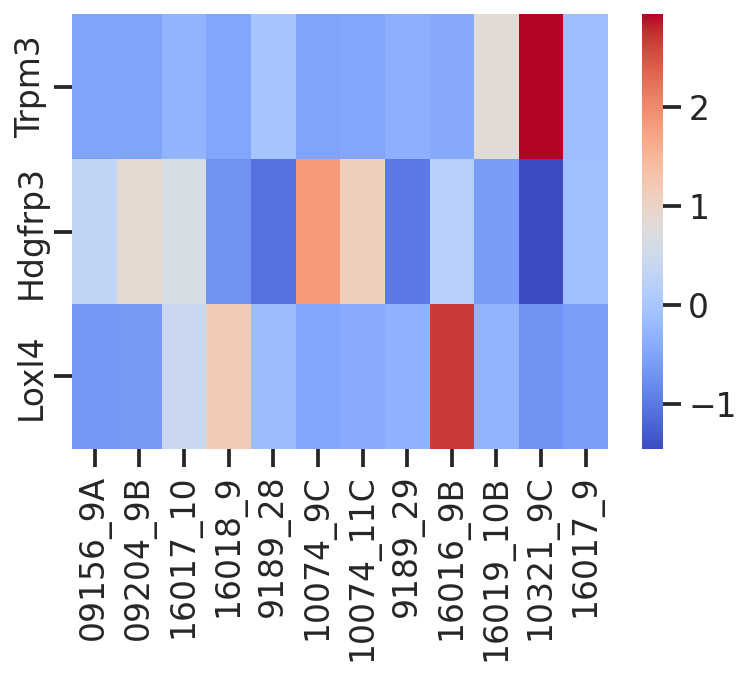

In [21]:
# 5, 4, 3
sns.heatmap(df_known_z, cmap='coolwarm')

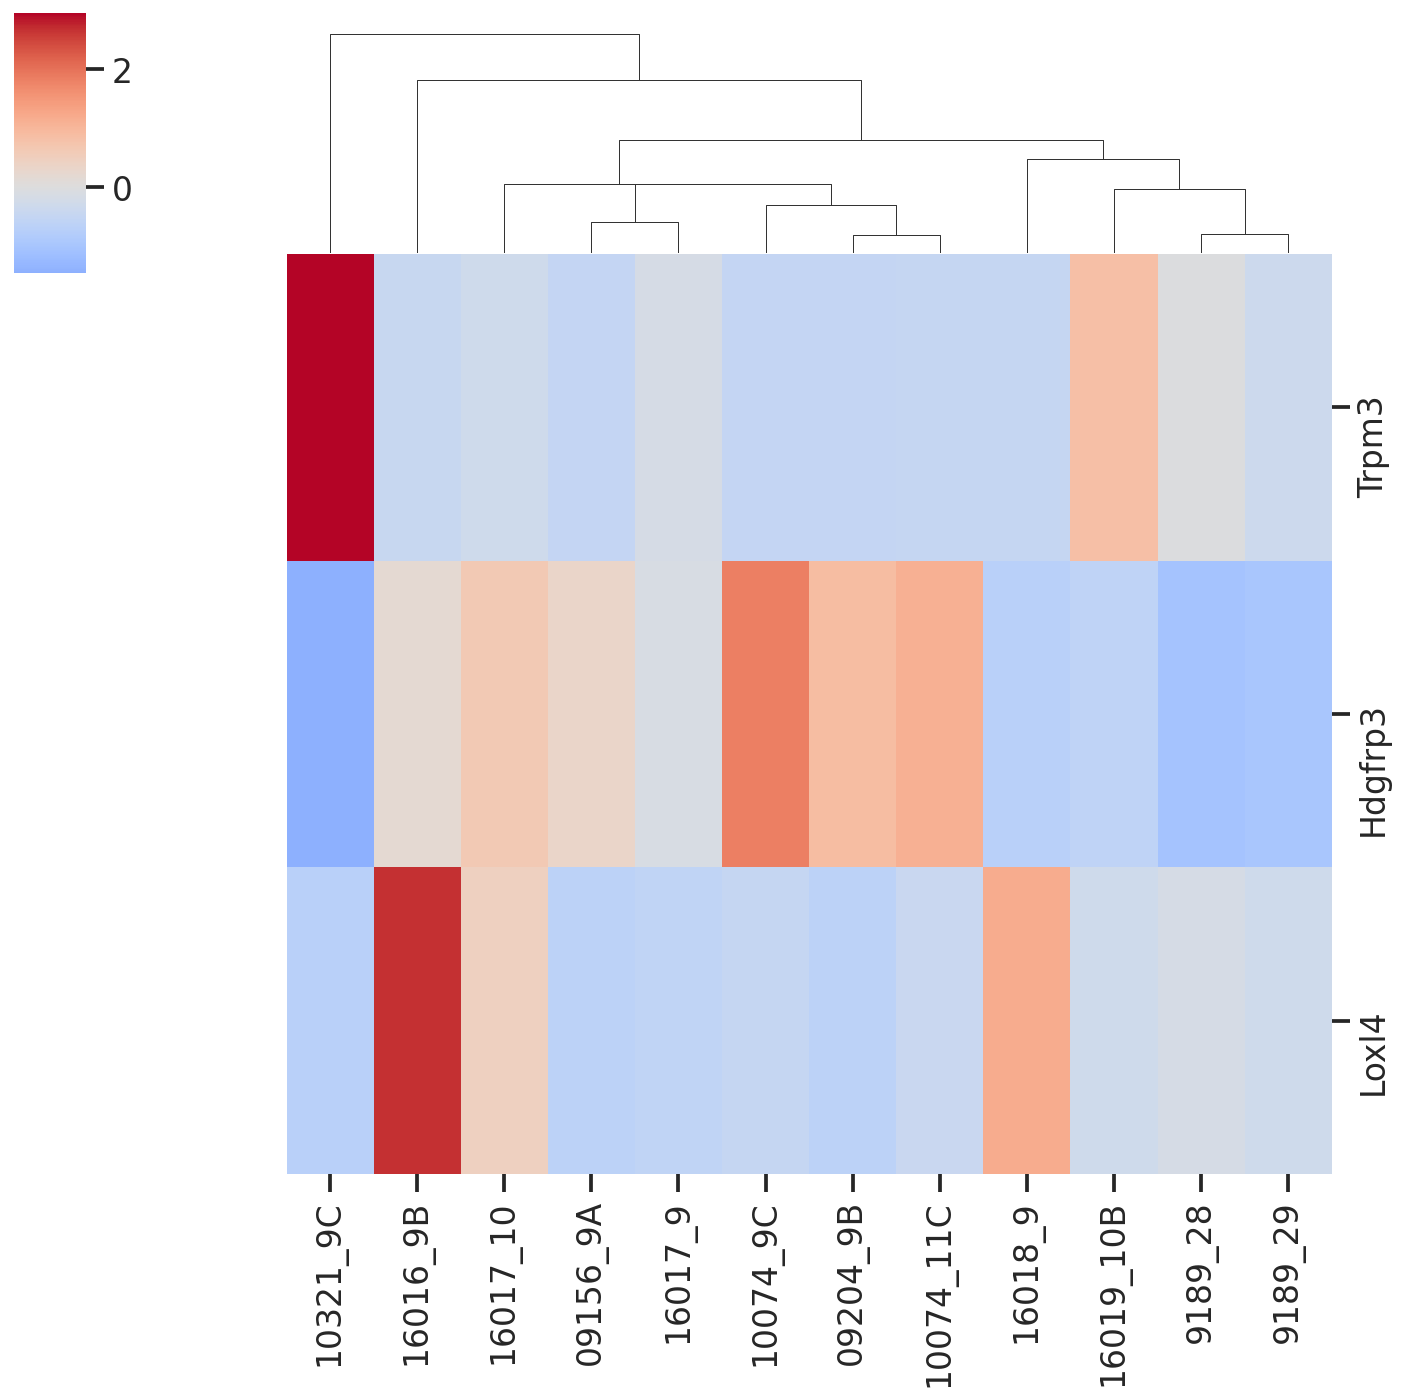

In [22]:
sns.clustermap(df_known_z, row_cluster=False, cmap='coolwarm', center=0)

In [23]:
genepanels = [
    'Trpm3',
    'Tyr',
    
    'Hdgfrp3',
    'Mycn',
    
    'Loxl4',
    'Hotair',
]

df_known = df.loc[genepanels]
df_known_z = df_known.subtract(df_known.mean(axis=1), axis=0).divide(df_known.std(axis=1), axis=0)

<AxesSubplot:>

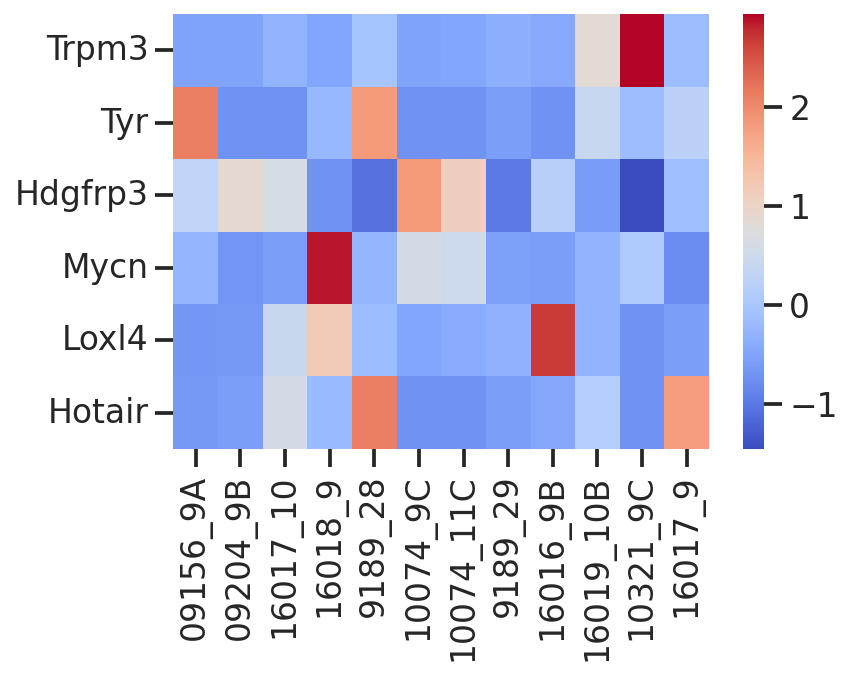

In [24]:
# 5, 4, 3
sns.heatmap(df_known_z, cmap='coolwarm')

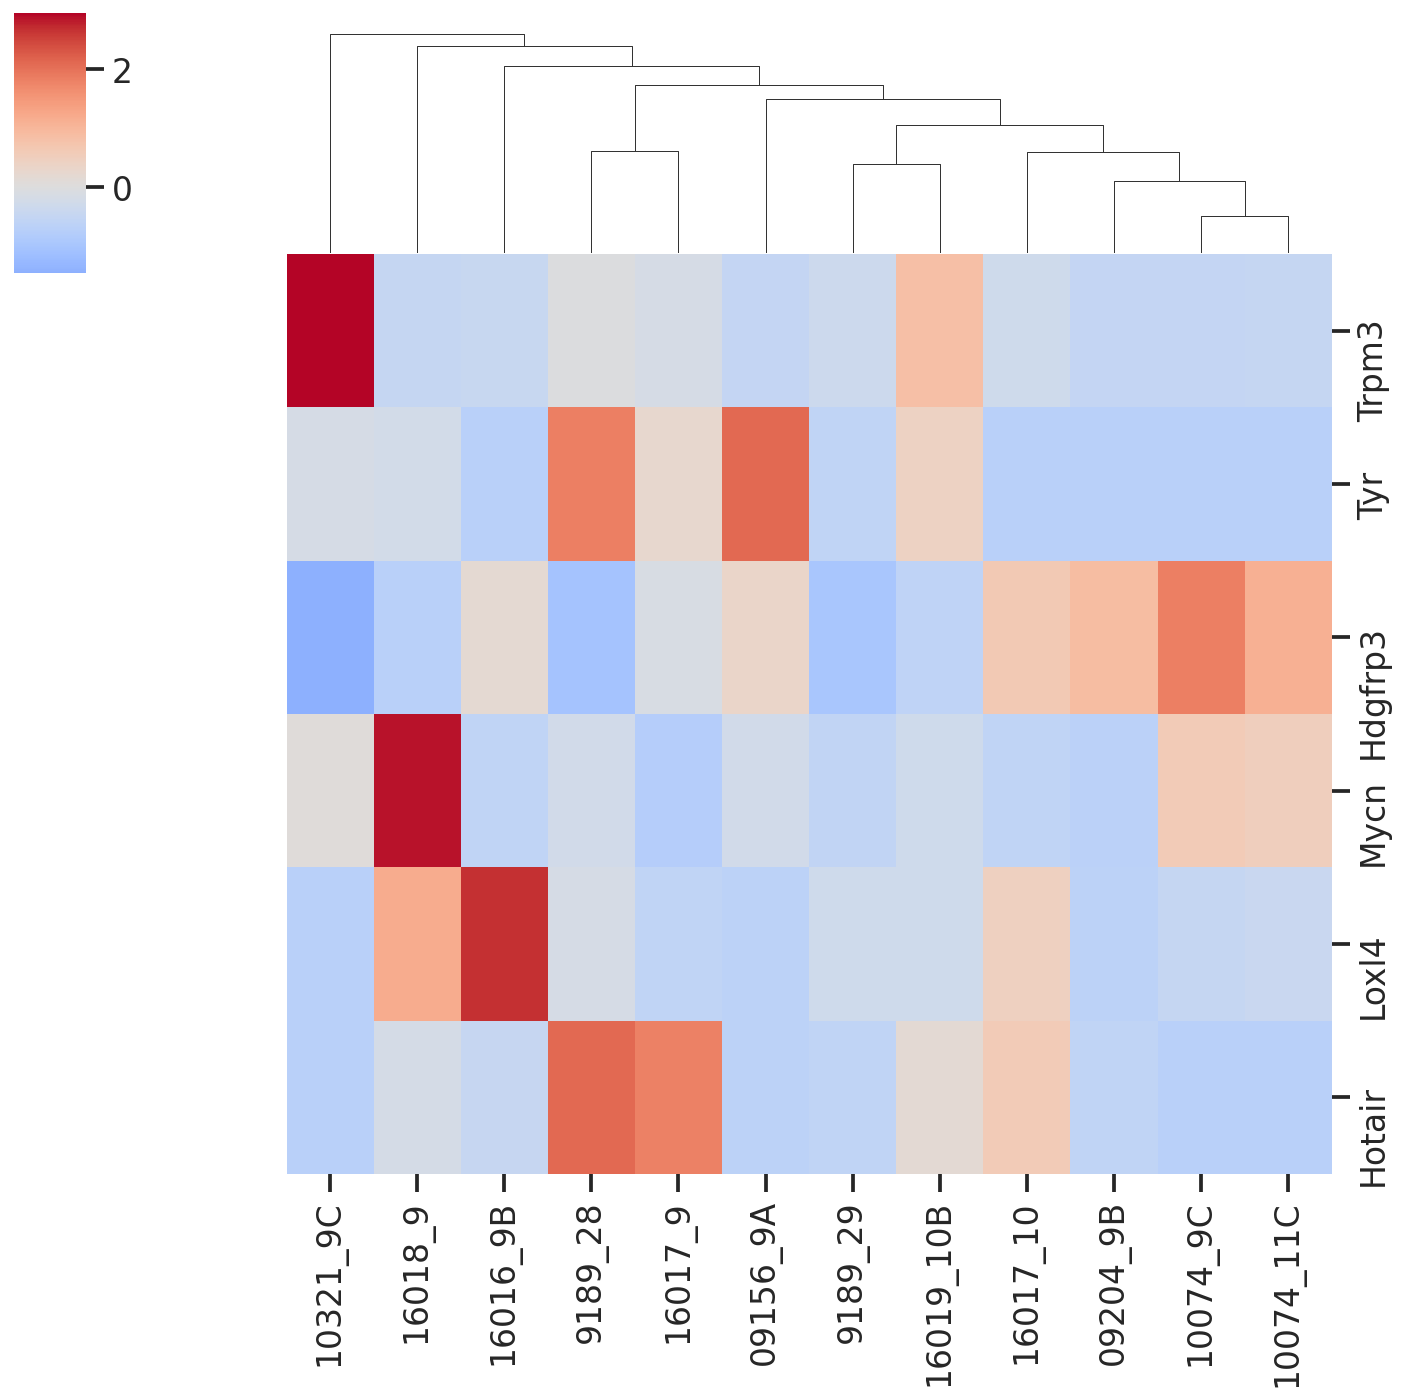

In [25]:
sns.clustermap(df_known_z, row_cluster=False, cmap='coolwarm', center=0)